In [1]:
using Plots
using LinearAlgebra
using Random
using Luxor

In [2]:
function IAV_organization(viral_length, binding_radius)                                                 
    # ==============================================================================================================
    # IAV_organization(viral_length,binding_radius): specifies the x-y coordinates of HA and NA on the surface of an 
    # IAV viral particle.
    #     viral_length: length of the virus's main axis [m]
    #     binding_radius: distance between adjacent molecules [m]
    # Returns a set of HA coordinates, NA coordinates, and the corners of a rectangle which defines the maximum 
    # bounding rectangle of the IAV particle.
    # ==========================================================================
    
    # Calculating vertical heights
    height = sqrt(3) * binding_radius / 2
    height_twice = sqrt(3) * binding_radius

    height_max = viral_length / 2
    height_min = -viral_length / 2

    # Calculating y coordinates
    y0 = collect(height_min:height_twice:height_max)
    y1 = collect(height_min:height_twice:(height_max + height_twice))
    y2 = collect((height_min - height_twice):height_twice:(height_max + height_twice))

    # Calculating x coordinates
    x0 = zeros(length(y0))
    x1 = zeros(length(y1))
    x2 = zeros(length(y2))

    # Concatenating coordinates
    y_cord = vcat(y0, y1 .- height, y2, y1 .- height, y2, y1 .- height, y2, y1 .- height, y0)
    x_cord = vcat(x0 .- 2*binding_radius, x1 .- 3*binding_radius/2, x2 .- binding_radius, x1 .- binding_radius/2, x2, x1 .+ binding_radius/2, x2 .+ binding_radius, x1 .+ 3*binding_radius/2, x0 .+ 2*binding_radius)

    # Calculating corners of the bounding rectangle
    IAV_binding_rectangle_corners = [minimum(x_cord)-binding_radius maximum(y_cord)+binding_radius;
               maximum(x_cord)+binding_radius maximum(y_cord)+binding_radius;
               maximum(x_cord)+binding_radius minimum(y_cord)-binding_radius;
               minimum(x_cord)-binding_radius minimum(y_cord)-binding_radius]

    # Separating HA and NA positions
    i = findall(y_cord .< -2 * viral_length / 5)
    j = findall(y_cord .>= -2 * viral_length / 5)

    # Filter out NA and HA
    HA_coordinates = [x_cord[j] y_cord[j]]
    NA_coordinates = [x_cord[i] y_cord[i]]

    return HA_coordinates, NA_coordinates, IAV_binding_rectangle_corners
end

IAV_organization (generic function with 1 method)

In [21]:
function plotIAV()
    p = plot(IAV_binding_rectangle_corners_plot[:, 1], IAV_binding_rectangle_corners_plot[:, 2], marker=(:dot, 4), label="corners", grid=true, aspect_ratio=:equal, legend=true)
    scatter!(HA_coordinates[:, 1], HA_coordinates[:, 2], markersize=4, color="blue", label="HA")
    scatter!(NA_coordinates[:, 1], NA_coordinates[:, 2], markersize=4, color="red", label="NA")
    
    xlabel!("X-axis")
    ylabel!("Y-axis")
    title!("Plot of IAV organizations")
    display(plot!(p))
end

function plotIAV_SA_Bond()
    particles_free, particles_HA, particles_NA = FilterParticlesbyBindingLigand(Particles_coordinates)
    CleavedSA_coordinates, CarpetSA_coordinates, FloatingAntibody_coordinates = FilterParticlesbyNature(particles_free)
    CarpetSA_coordinates_inRect, CarpetSA_coordinates_outRect = FilterParticlesbyRect(CarpetSA_coordinates, IAV_binding_rectangle_corners)
    FloatingAntibody_coordinates_inRect, FloatingAntibody_coordinates_outRect = FilterParticlesbyRect(FloatingAntibody_coordinates, IAV_binding_rectangle_corners)
    
    _, CarpetSA_HA, FloatingAntibody_HA = FilterParticlesbyNature(particles_HA)
    _, CarpetSA_NA, FloatingAntibody_NA = FilterParticlesbyNature(particles_NA)
    
    p = plot(Boundary_rectangle_corners_plot[:, 1], Boundary_rectangle_corners_plot[:, 2], marker=(:dot, 4), color="black", label="Boundary", grid=true, aspect_ratio=:equal, legend=true, loc="right", horiz=true)
    plot!(IAV_binding_rectangle_corners_plot[:, 1], IAV_binding_rectangle_corners_plot[:, 2], marker=(:dot, 4), color="black", label="BindingRadius")
    scatter!(HA_coordinates[:, 1], HA_coordinates[:, 2], markersize=6, color="lightblue", markerstrokewidth=0.5, label="HA")
    scatter!(NA_coordinates[:, 1], NA_coordinates[:, 2], markersize=6, color="lightgreen", markerstrokewidth=0.5, label="NA")
    # Plot disabled ligand
    scatter!(FloatingAntibody_HA[:, 5], FloatingAntibody_HA[:, 6], markersize=6, color="red", markerstrokewidth=0.5, label="Disabled HA")
    scatter!(FloatingAntibody_NA[:, 5], FloatingAntibody_NA[:, 6], markersize=6, color="red", markerstrokewidth=0.5, label="Disabled NA")
    
    scatter!(CleavedSA_coordinates[:, 2], CleavedSA_coordinates[:, 3], markersize=3, color="red", markerstrokecolor="red", label="CleavedSA")
    scatter!(CarpetSA_coordinates_outRect[:, 2], CarpetSA_coordinates_outRect[:, 3], markersize=4, color="orange", markerstrokecolor="orange", label="CarpetSA_outRect")
    scatter!(CarpetSA_coordinates_inRect[:, 2], CarpetSA_coordinates_inRect[:, 3], markersize=4, color="orange", markerstrokewidth=0.2, label="CarpetSA_inRect")
    scatter!(FloatingAntibody_coordinates_outRect[:, 2], FloatingAntibody_coordinates_outRect[:, 3], markersize=4, color="brown", markerstrokecolor="brown", label="FloatingAntibody_outRect")
    scatter!(FloatingAntibody_coordinates_inRect[:, 2], FloatingAntibody_coordinates_inRect[:, 3], markersize=4, color="brown", markerstrokewidth=0.2, label="FloatingAntibody_inRect")
    scatter!(CarpetSA_HA[:, 2], CarpetSA_HA[:, 3], markersize=4, color="orange", markerstrokewidth=0.2, shape=:utriangle, label="")
    scatter!(CarpetSA_NA[:, 2], CarpetSA_NA[:, 3], markersize=4, color="orange", markerstrokewidth=0.2, shape=:utriangle, label="")
    scatter!(FloatingAntibody_HA[:, 2], FloatingAntibody_HA[:, 3], markersize=4, color="brown", markerstrokewidth=0.2, shape=:utriangle, label="")
    scatter!(FloatingAntibody_NA[:, 2], FloatingAntibody_NA[:, 3], markersize=4, color="brown", markerstrokewidth=0.2, shape=:utriangle, label="")

    if !isempty(CarpetSA_HA)
        # plot!([(CarpetSA_HA[1, 2], CarpetSA_HA[1, 3]), (CarpetSA_HA[1, 5], CarpetSA_HA[1, 6])], line=(:yellow, 2), label="CarpetSA_HA Bond")
        for pair in eachrow(CarpetSA_HA)
            plot!([(pair[2], pair[3]), (pair[5], pair[6])], line=(:yellow, 2), label="")
        end
    end# cyan, lightgreen

    if !isempty(FloatingAntibody_HA)
        # plot!([(FloatingAntibody_HA[1, 2], FloatingAntibody_HA[1, 3]), (FloatingAntibody_HA[1, 5], FloatingAntibody_HA[1, 6])], line=(:yellow, 2), label="FloatingAntibody_HA Bond")
        for pair in eachrow(FloatingAntibody_HA)
            plot!([(pair[2], pair[3]), (pair[5], pair[6])], line=(:yellow, 2), label="")
        end
    end
    
    if !isempty(CarpetSA_NA)
        # plot!([(CarpetSA_HA[1, 2], CarpetSA_HA[1, 3]), (CarpetSA_HA[1, 5], CarpetSA_HA[1, 6])], line=(:yellow, 2), label="CarpetSA_HA Bond")
        for pair in eachrow(CarpetSA_NA)
            plot!([(pair[2], pair[3]), (pair[5], pair[6])], line=(:yellow, 2), label="")
        end
    end# cyan, lightgreen

    if !isempty(FloatingAntibody_NA)
        # plot!([(FloatingAntibody_HA[1, 2], FloatingAntibody_HA[1, 3]), (FloatingAntibody_HA[1, 5], FloatingAntibody_HA[1, 6])], line=(:yellow, 2), label="FloatingAntibody_HA Bond")
        for pair in eachrow(FloatingAntibody_NA)
            plot!([(pair[2], pair[3]), (pair[5], pair[6])], line=(:yellow, 2), label="")
        end
    end
    
    xlabel!("X-axis")
    ylabel!("Y-axis")
    title!("Plot of IAV inside SA with bond")
    plot!(size=(1920,1080))
    # display(p)
    return p
end

plotIAV_SA_Bond (generic function with 1 method)

In [22]:
function Shuffle(coordinates::Matrix{Any})
    row_indices = 1:size(coordinates, 1)
    shuffled_indices = Random.shuffle(row_indices)
    coordinates = coordinates[shuffled_indices, :]
    return coordinates
end

function FilterParticlesbyNature(coordinates::Matrix{Any})
    CleavedSA_coordinates = coordinates[coordinates[:, 1] .== CleavedSA, :]
    CarpetSA_coordinates = coordinates[coordinates[:, 1] .== CarpetSA, :]
    FloatingAntibody_coordinates = coordinates[coordinates[:, 1] .== FloatingAntibody, :]
    return CleavedSA_coordinates, CarpetSA_coordinates, FloatingAntibody_coordinates
end

function FilterParticlesbyRect(coordinates::Matrix{Any}, rectangle_corners::Matrix{Float64})
    polygon = Luxor.Point.(rectangle_corners[:, 1], rectangle_corners[:, 2])
    points = Luxor.Point.(coordinates[:, 2], coordinates[:, 3])
    inside = [isinside(p, polygon; allowonedge=true) for p in points]
    Particles_coordinates_inRect = coordinates[inside, :]
    Particles_coordinates_outRect = coordinates[.!inside, :]
    return Particles_coordinates_inRect, Particles_coordinates_outRect
end


function FilterParticlesbyBindingLigand(coordinates::Matrix{Any})
    Particles_Free = coordinates[coordinates[:, 4] .== Null, :]
    Particles_HA = coordinates[coordinates[:, 4] .== HA, :]
    Particles_NA = coordinates[coordinates[:, 4] .== NA, :]
    return Particles_Free, Particles_HA, Particles_NA
end

function BindingPickedParticles(Ligand, coordinates::Matrix{Any}, Type)
    _, CarpetSAs, FloatingAntibodies = FilterParticlesbyNature(coordinates)

    if size(FloatingAntibodies, 1) == 0
        Particles_Free_inRect_inRadius_bind = coordinates
        Particles_Free_inRect_inRadius_bind
        Particles_Free_inRect_inRadius_bind[:, 4:6] .= [Type Ligand[1] Ligand[2]]
        Particles_Free_inRect_inRadius_bind
                                
        Ligand[3] = Ligand[3] + size(Particles_Free_inRect_inRadius_bind,1)
    else
        particles_free_inRect_inRadius_bind_antibody_index = randperm(size(FloatingAntibodies, 1))[1:1]
        particles_free_inRect_inRadius_bind_antibody = FloatingAntibodies[particles_free_inRect_inRadius_bind_antibody_index, :]
        particles_free_inRect_inRadius_not_bind_antibody_index = setdiff(1:size(FloatingAntibodies, 1), particles_free_inRect_inRadius_bind_antibody_index)
        particles_free_inRect_inRadius_not_bind_antibody = FloatingAntibodies[particles_free_inRect_inRadius_not_bind_antibody_index, :]
        
        particles_free_inRect_inRadius_bind_antibody                    
        particles_free_inRect_inRadius_bind_antibody[:, 4:6] .= [Type Ligand[1] Ligand[2]]
        particles_free_inRect_inRadius_bind_antibody
     
        Ligand[3] = 0
        Ligand[4] = Blocked
                                
        Particles_Free_inRect_inRadius_bind = vcat(CarpetSAs, particles_free_inRect_inRadius_not_bind_antibody, particles_free_inRect_inRadius_bind_antibody)
    end
    return Particles_Free_inRect_inRadius_bind
end

function BindingGroup(Ligands_coordinates::Matrix{Any}, coordinates::Matrix{Any}, max_bond::Int, Type)
    # Generate a new Particles_Free_inRect
    for Ligand in eachrow(Ligands_coordinates)
        # @show Ligand
        if Ligand[4] != Blocked
            n = Int(max_bond - Ligand[3])
            if n > 0
                # Computing distance and filtering out particles within the binding radius of the ligand
                Particles_Free_inRect_inRadius_index = (sqrt.((coordinates[:, 2] .- Ligand[1]).^2 .+ (coordinates[:, 3] .- Ligand[2]).^2)) .<= r
                Particles_Free_inRect_inRadius = coordinates[Particles_Free_inRect_inRadius_index, :]
                Particles_Free_inRect_outRadius = coordinates[.!Particles_Free_inRect_inRadius_index, :]

                if size(Particles_Free_inRect_inRadius, 1) != 0
                    # Picking possible binding particles by pon
                    Particles_Free_inRect_inRadius_possible_bind_index = rand(size(Particles_Free_inRect_inRadius, 1)) .< pon
                    Particles_Free_inRect_inRadius_possible_bind = Particles_Free_inRect_inRadius[Particles_Free_inRect_inRadius_possible_bind_index, :]
                    Particles_Free_inRect_inRadius_not_bind = Particles_Free_inRect_inRadius[.!Particles_Free_inRect_inRadius_possible_bind_index, :]

                    if size(Particles_Free_inRect_inRadius_possible_bind, 1) != 0
                        # If too many candidate
                        if size(Particles_Free_inRect_inRadius_possible_bind, 1) > n
                            # Picking max n SA for bind
                            Particles_Free_inRect_inRadius_pick_bind_index = randperm(size(Particles_Free_inRect_inRadius_possible_bind, 1))[1:n]
                            Particles_Free_inRect_inRadius_pick_bind = Particles_Free_inRect_inRadius_possible_bind[Particles_Free_inRect_inRadius_pick_bind_index, :]
                            Particles_Free_inRect_inRadius_not_pick_bind_index = setdiff(1:size(Particles_Free_inRect_inRadius_possible_bind, 1), Particles_Free_inRect_inRadius_pick_bind_index)
                            Particles_Free_inRect_inRadius_not_pick_bind = Particles_Free_inRect_inRadius_possible_bind[Particles_Free_inRect_inRadius_not_pick_bind_index, :]

                            Particles_Free_inRect_inRadius_bind = BindingPickedParticles(Ligand, Particles_Free_inRect_inRadius_pick_bind, Type)
                            coordinates = vcat(Particles_Free_inRect_outRadius, Particles_Free_inRect_inRadius_not_bind, Particles_Free_inRect_inRadius_bind)              
                        else # If too less candidate
                            Particles_Free_inRect_inRadius_bind = BindingPickedParticles(Ligand, Particles_Free_inRect_inRadius_possible_bind, Type)
                            coordinates = vcat(Particles_Free_inRect_outRadius, Particles_Free_inRect_inRadius_not_bind, Particles_Free_inRect_inRadius_bind)                                
                        end
                    end
                end
            end
        end
    end
    return coordinates
end

# # Partitions are inclusive for top left bottom right
# # topLeft    | top    | topLeft
# # ----------------------------------
# # left       | center | right
# # ----------------------------------
# # bottomLeft | bottom | bottomRight
# function FilterParticlesbyOutOfBoundaryDirection(coordinates::Matrix{Any})
#     top = coordinates[(coordinates[:, 3] .>= -Lmax) .& (coordinates[:, 3] .<= Lmax) .& (coordinates[:, 4] .>= Lmax), :]
#     bottom = coordinates[(coordinates[:, 3] .>= -Lmax) .& (coordinates[:, 3] .<= Lmax) .& (coordinates[:, 4] .<= -Lmax), :]
#     left = coordinates[(coordinates[:, 4] .>= -Lmax) .& (coordinates[:, 4] .<= Lmax) .& (coordinates[:, 3] .<= -Lmax), :]
#     right = coordinates[(coordinates[:, 4] .>= -Lmax) .& (coordinates[:, 4] .<= Lmax) .& (coordinates[:, 3] .>= Lmax), :]
#     topLeft = coordinates[(coordinates[:, 3] .< -Lmax) .& (coordinates[:, 4] .> Lmax), :]
#     topRight = coordinates[(coordinates[:, 3] .> Lmax) .& (coordinates[:, 4] .> Lmax), :]
#     bottomLeft = coordinates[(coordinates[:, 3] .< -Lmax) .& (coordinates[:, 4] .< -Lmax), :]
#     bottomRight = coordinates[(coordinates[:, 3] .> Lmax) .& (coordinates[:, 4] .< -Lmax), :]
#     return top, bottom, left, right, topLeft, topRight, bottomLeft, bottomRight
# end

# function SymmetricBoundary(coordinates::Matrix{Any})
#     coordinates_inRect, coordinates_outRect = FilterParticlesbyRect(coordinates, Boundary_rectangle_corners)

#     top, bottom, left, right, topLeft, topRight, bottomLeft, bottomRight = filterParticlesbyOutOfBoundaryDirection(coordinates_outRect)
#     top[:, 4] = top[:, 4] .- Lmax
#     bottom[:, 4] = bottom[:, 4] .+ Lmax
#     left[:, 3] = left[:, 3] .+ Lmax
#     right[:, 3] = right[:, 3] .- Lmax
#     topLeft[:, 3] = topLeft[:, 3] .+ Lmax
#     topLeft[:, 4] = topLeft[:, 4] .- Lmax
#     topRight[:, 3] = topRight[:, 3] .- Lmax
#     topRight[:, 4] = topRight[:, 4] .- Lmax
#     bottomLeft[:, 3] = bottomLeft[:, 3] .+ Lmax
#     bottomLeft[:, 4] = bottomLeft[:, 4] .+ Lmax
#     bottomRight[:, 3] = bottomRight[:, 3] .- Lmax
#     bottomRight[:, 4] = bottomRight[:, 4] .+ Lmax
    
#     return vcat(coordinates_inRect, top, bottom, left, right, topLeft, topRight, bottomLeft, bottomRight)
# end

BindingGroup (generic function with 1 method)

In [23]:
# Warning: revision inplace
function Binding()
    Particles_Free, Particles_HA, Particles_NA = FilterParticlesbyBindingLigand(Particles_coordinates)
    Particles_Free_inRect, Particles_Free_outRect = FilterParticlesbyRect(Particles_Free, IAV_binding_rectangle_corners) # Partition the SA by IAV_binding_rectangle_corners to reduce computing time
    
    if rand() <= 0.5
        Particles_Free_inRect = BindingGroup(HA_coordinates, Particles_Free_inRect, MAX_HA_BOND, HA)
        bond_free, HA_bond, NA_bond = FilterParticlesbyBindingLigand(Particles_Free_inRect)
        Particles_Free_inRect = BindingGroup(NA_coordinates, bond_free, MAX_NA_BOND, NA)
        global Particles_coordinates = vcat(HA_bond, NA_bond, Particles_Free_inRect, Particles_Free_outRect, Particles_HA, Particles_NA)
    else 
        Particles_Free_inRect = BindingGroup(NA_coordinates, Particles_Free_inRect, MAX_NA_BOND, NA)
        bond_free, HA_bond, NA_bond = FilterParticlesbyBindingLigand(Particles_Free_inRect)
        Particles_Free_inRect = BindingGroup(HA_coordinates, bond_free, MAX_HA_BOND, HA)
        global Particles_coordinates = vcat(HA_bond, NA_bond, Particles_Free_inRect, Particles_Free_outRect, Particles_HA, Particles_NA)
    end
end

# # Warning: revision in place
# # TODO: need to determine if cleaved SA will be denature which provent it from further binding
# # Assumption: All binded SA are within Rect (As binded SA outside Rect should rupture)
# # Run over all SA in Rect. For those binded SA, debind them by poff and cleave them by pcut. Release SA back to carpet, cleaved into suspension, or removed from simulation (if denature)
# function DebindAndCleave()
#     SA_coordinates_inRect, SA_coordinates_outRect = CutSAbyRect()
    
#     if isempty(SA_coordinates_inRect) || (poff == 0 && pcut == 0)
#         SA_coordinates = vcat(SA_coordinates, SA_coordinates_inRect)
#         return
#     end

#     SA_Free, SA_HA, SA_NA = FilterParticlesbyBindingLigand(SA_coordinates_inRect)

#     if poff <= 1
#         SA_HA_off_index = rand(size(SA_HA, 1)) .< poff
#         SA_HA[SA_HA_off_index, 5] .= Null
#     else
#         SA_HA[:, 5] .= Null
#     end
    
#     if pcut <= 1
#         SA_NA_off_index = rand(size(SA_HA, 1)) .< pcut
#         SA_NA[SA_NA_off_index, 5] .= Null
#         SA_NA[SA_NA_off_index, 2] .= suspension # TODO: if cleaved SA is denature, then set Restinglocation to Removed
#     else
#         SA_NA[:, 5] .= Null
#         SA_NA[:, 2] .= suspension # TODO: if cleaved SA is denature, then set Restinglocation to Removed
#     end

#     global Particles_coordinates = vcat(SA_coordinates_outRect, SA_Free, SA_HA, SA_NA)
# end

# # Warning: revision in place
# function SimpleRandomDiffusion()    
#     SA_Free, SA_HA, SA_NA = FilterParticlesbyBindingLigand(Particles_coordinates)
#     SA_Free_carpet, SA_Free_suspension = filterSAbyRestingLocation(SA_Free)

#     random_sign_index = rand(size(SA_Free_suspension, 1)) .>= 0.5
#     random_sign = rand(size(SA_Free_suspension, 1))
#     random_sign[random_sign_index] .= 1
#     random_sign[.!random_sign_index] .= -1
#     random_swap_index = rand(size(SA_Free_suspension, 1)) .<= 0.5
            
#     dx = 2 * ds * rand(size(SA_Free_suspension, 1)) .- ds
#     dy = random_sign .* sqrt.(ds.^2 .- dx.^2)
    
#     dx_rand = copy(dx)
#     dx_rand[random_swap_index, 1] = dy[random_swap_index, 1]
#     dy_rand = copy(dy)
#     dy_rand[random_swap_index, 1] = dx[random_swap_index, 1]

#     SA_Free_suspension[:, 3] = SA_Free_suspension[:, 3] .+ dx_rand
#     SA_Free_suspension[:, 4] = SA_Free_suspension[:, 4] .+ dy_rand
    
#     SA_Free_suspension = SymmetricBoundary(SA_Free_suspension)
    
#     global Particles_coordinates = vcat(SA_Free_carpet, SA_Free_suspension, SA_HA, SA_NA)
# end


# # Warning: revision inplace
# function rotation(coordinateMatrix::Matrix{Float64}, rotationMatrix::Matrix{Float64})
#     for row in 1:size(coordinateMatrix, 1)
#         coordinateMatrix[row, 1:2] = rotationMatrix * coordinateMatrix[row, 1:2]
#     end
# end

# # Warning: revision inplace
# function translation(coordinateMatrix::Matrix{Float64}, translationVector::Vector{Float64})
#     for row in 1:size(coordinateMatrix, 1)
#         coordinateMatrix[row, 1:2] = coordinateMatrix[row, 1:2] + translationVector
#     end
# end

# # Warning: revision inplace
# function applyMovements()
#     # Creates a 2x2 rotation matrix based on the delta_theta
#     rotationMatrix = [cos(dMovement[3]) sin(dMovement[3]); -sin(dMovement[3]) cos(dMovement[3])]
#     translationVector = dMovement[1:2]
    
#     # Apply rotation and then translate based on change vector
#     rotation(HA_coordinates, rotationMatrix)
#     translation(HA_coordinates, translationVector)
    
#     rotation(NA_coordinates, rotationMatrix)
#     translation(NA_coordinates, translationVector)
    
#     rotation(IAV_binding_rectangle_corners, rotationMatrix)
#     translation(IAV_binding_rectangle_corners, translationVector)
# end

Binding (generic function with 1 method)

In [24]:
function IAV_diffusion(nSimStep)
    # ==========================================================================
    # IAV_diffusion_mobile_SA(sname): simulates the diffusion
    # of a virus particle on a 2D surface with immobile sialic acid. Periodically
    # displays simulation progress, plotting HA locations (blue dots), NA
    # locations (red dots), sialic acid locations (green dots), and currently
    # bound sialic acid residues (black dots).
    # 
    # Inputs:
    #   sname: file name for saved results
    # Saved variables:
    #   NA_pos: coordinates of NA in the frame of the virus
    #   HA_pos: coordinates of HA in the frame of the virus
    #   P: virus position and orientation (column 1 = x, column 2 = y,
    #   column 3 = theta)
    #   S: sialic acid coordinates
    #   IB: indices of bound sialic acid
    #   Lmax: simulation window size
    #   kon: HA on rate
    #   kcat: NA catalytic rate
    #   koff: HA off rate
    #   t: time (simulation steps)
    # ==========================================================================
    for n in 1:nSimStep
        
        # Shuffle the HA and NA list so that we can sample binding SA in random order
        global HA_coordinates = Shuffle(HA_coordinates)
        global NA_coordinates = Shuffle(NA_coordinates)
        
        # Binding
        Binding()
        push!(ResultPlots, plotIAV_SA_Bond())
        

        # Diffusion
        # SimpleRandomDiffusion()
        # push!(ResultPlots, plotIAV_SA_Bind())
        
        # Generate random movement subject to binding restriction
        # TODO:
        
        # Apply resulting movement [dx dy dtheta] from last iteration on IAV
        # applyMovements()
        # push!(ResultPlots, plotIAV_SA_Bind())
        
        # Cleave and debind SA stochastically
        # DebindAndCleave()
        # push!(ResultPlots, plotIAV_SA_Bind())

        # Remove removed SA
        # GarbageCollection()
    end
end

IAV_diffusion (generic function with 1 method)

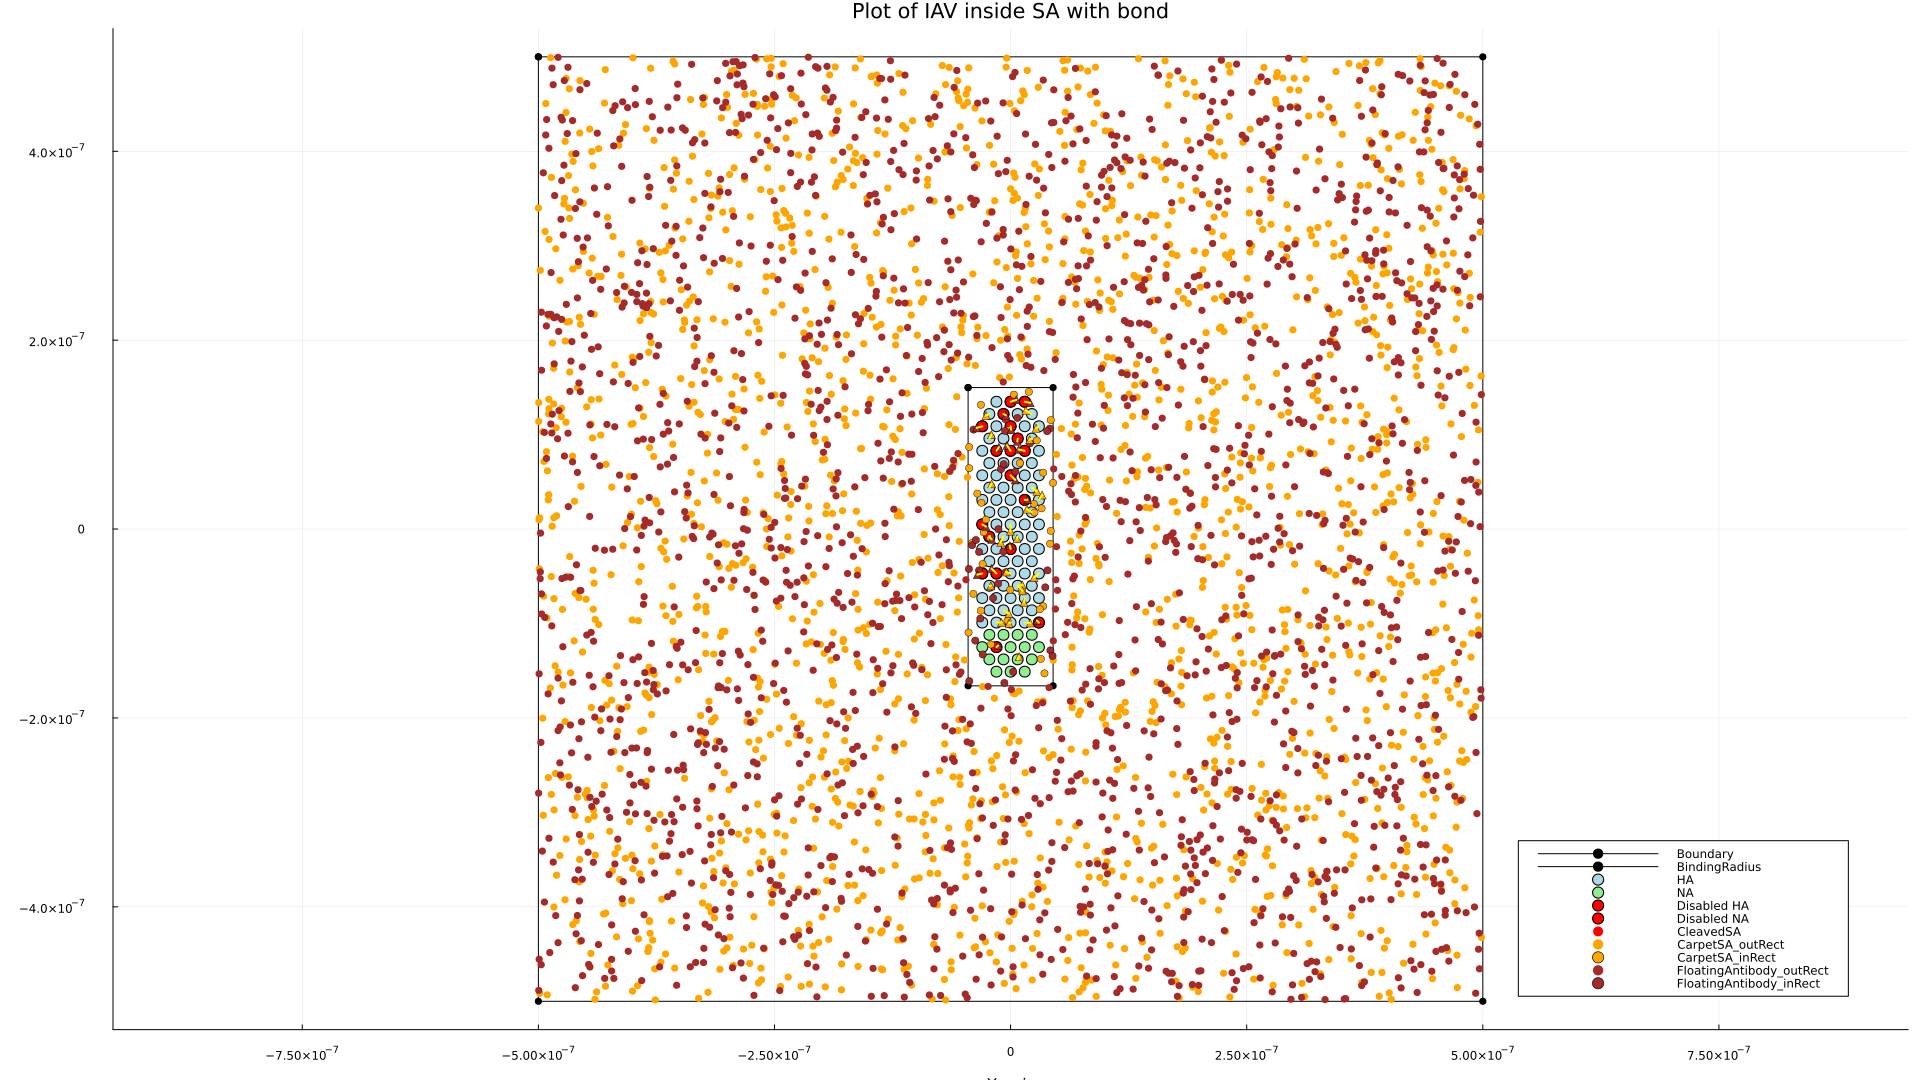

"/home/jovyan/rex_iav_diffusion/test.png"

In [27]:
# Main Function

# Initiation: Mathematics Coefficients =====================================
# All coefficient adapted from Vachy and Fletcher's model [1]:
# Notice: original b has been replaced by r as the binding radius
    
dt = 0.2 # Time step [s]
ds = 1e-9 # SA step size [m]; related to SA diffusion coefficient through get_DSA.m

# Virus length (L), diameter (d), binding radius (r):
L = 0.25e-6; d = 0.1e-6; r = 7.5e-9

# Thermal energy (kT), viscosity (mu), window size (-Lmax to +Lmax)
kT = 1.38e-23 * 300; mu = 1e-3; Lmax = 0.5e-6

# Effective concentration of one SA within binding radius [mol/L]
cL = (1 / 6.02e23) / (1000 * 4/3 * π * r^3)     

# Translational & rotational mobilities
Dx = kT * (log(2 * L / d) - 1/2) / (2 * π * mu * L)
Dy = kT * (log(2 * L / d) + 1/2) / (4 * π * mu * L)
Dtheta = 3 * kT * (log(2 * L / d) - 1/2) / (π * mu * L^3)

kcat = 100      # Catalytic rate of NA (1/s)
kon = 400       # HA on rate (1/(Ms))
koff = 1        # HA off rate (1/s)
pon = kon * cL * dt # Probability of binding in time step dt (HA-SA)
poff = koff * dt     # Probability of unbinding in time step dt (HA-SA)
pcut = kcat * dt     # Probability of cleaving SA in time step dt

# Mobility coefficients
mp = sqrt(2 * Dx * dt)
mt = sqrt(2 * Dy * dt)
mw = sqrt(2 * Dtheta * dt)
# ==========================================================================
    
# Initiation: Simulation Constant and Variables ============================
# Random.seed!(hash("REX"))

# Save Result Plots
ResultPlots = Vector{Plots.Plot}()

# Maximum binding number
MAX_HA_BOND = 3
MAX_NA_BOND = 4
    
# Define movement vector, [delta x, delta y, delta theta]
dMovement = zeros(3, 1)

# Initialize HA and NA positions along with binding rectangle
# col 1 is ligand's x coordinates
# col 2 is ligand's y coordinates
# col 3 is ligand's current binding numbers
# col 4 is ligand's state (Working or Blocked)
@enum LigandState Blocked=0 Working=1
HA_coordinates, NA_coordinates, IAV_binding_rectangle_corners = IAV_organization(L, 2 * r)

HA_coordinates = hcat(HA_coordinates, zeros(Int, size(HA_coordinates, 1), 1)) # Add a column which keep track of the number of binds
HA_coordinates = hcat(HA_coordinates, fill(Working, size(HA_coordinates, 1))) # Add a column which keep track of the working state of ligands

NA_coordinates = hcat(NA_coordinates, zeros(Int, size(NA_coordinates, 1), 1)) # Add a column which keep track of the number of binds
NA_coordinates = hcat(NA_coordinates, fill(Working, size(NA_coordinates, 1))) # Add a column which keep track of the working state of ligands

# Add simulation boundaries 
Boundary_rectangle_corners = [-Lmax Lmax; Lmax Lmax; Lmax -Lmax; -Lmax -Lmax]

# For plotting purpose
IAV_binding_rectangle_corners_plot = vcat(IAV_binding_rectangle_corners, IAV_binding_rectangle_corners[1, :]')
Boundary_rectangle_corners_plot = [-Lmax Lmax; Lmax Lmax; Lmax -Lmax; -Lmax -Lmax; -Lmax Lmax]
    
# Number of sialic acid at carpet and in suspension
nCarpetSA = 2000
nFloatingAntibody = 200
    
# Initialize SA locations:
# col 1 is the NatureOfParticle enum (Removed or CarpetSA or FloatingAntibody)
# col 2 is SA's x coordinates
# col 3 is SA's y coordinates
# col 4 is the BindingLigand enum (Null or HA or NA)
# col 5 is ligand's x coordinates
# col 6 is ligand's y coordinates
@enum NatureOfParticle CleavedSA=0 CarpetSA=1 FloatingAntibody=2 
@enum BindingLigand Null=0 HA=1 NA=2
Particles_coordinates = hcat(
    vcat(fill(CarpetSA, nCarpetSA), fill(FloatingAntibody, nFloatingAntibody)),
    vcat(2 * Lmax * (rand(nCarpetSA, 2) .- 0.5), 2 * Lmax * (rand(nFloatingAntibody, 2) .- 0.5)),
    fill(Null, nCarpetSA + nFloatingAntibody),
    fill(undef, nCarpetSA + nFloatingAntibody, 2)
)
# ==========================================================================

# Simulation ===============================================================
IAV_diffusion(1)
# ==========================================================================

# Save Result ==============================================================
# # Create an animation from the vector of plots
# rm("output", recursive=true)
# mkdir("output")
# index = 1
# for p in ResultPlots
#     savefig(p, "output/" * string(index) * ".png")
#     index = index + 1
# end
display(ResultPlots[size(ResultPlots, 1)])
savefig(ResultPlots[size(ResultPlots, 1)], "test.png")

# anim = @animate for p in ResultPlots
    # p
# end
# # @gif(ResultPlots), vtk

# # # Save the animation as a GIF
# gif(anim, "result_animation.gif", fps = 4)
# ==========================================================================